# Linear Regression

### 1. import libraries

In [36]:

import "fmt"
import "gonum.org/v1/gonum/blas/blas64"
import "gonum.org/v1/gonum/mat"
import "gonum.org/v1/gonum/floats"
import "gonum.org/v1/gonum/stat"
import "gonum.org/v1/plot"
import "gonum.org/v1/plot/plotter"
import "gonum.org/v1/plot/plotutil"
import "gonum.org/v1/plot/vg"
//import "github.com/montanaflynn/stats" // be careful, it is different from gonum's stat
import "strings"
import "strconv"
import "github.com/kniren/gota/dataframe"
import "os"
import "encoding/csv"
import "github.com/kniren/gota/series"
import "math"
import "image/color"
import "io/ioutil"

In [2]:

func GetGraph(graphName string) ([]byte, error) { //utility to load graphs (to use later)
	infile, err := os.Open(graphName)
	bytes, err := ioutil.ReadAll(infile)
	infile.Close()
	return bytes, err
}

#### 2. Load working csv file

In [3]:
file, err := os.Open("../data/basketball.heigh.and.weigh.csv")
if err != nil {
    fmt.Println(err)
}

In [4]:
dataset := dataframe.ReadCSV(file)

In [5]:
file.Close()

In [6]:
fmt.Println(dataset)

[1034x6] DataFrame

    Name            Team     Position       Height(inches) Weight(pounds) ...
 0: Adam_Donachie   BAL      Catcher        74             180            ...
 1: Paul_Bako       BAL      Catcher        74             215            ...
 2: Ramon_Hernandez BAL      Catcher        72             210            ...
 3: Kevin_Millar    BAL      First_Baseman  72             210            ...
 4: Chris_Gomez     BAL      First_Baseman  73             188            ...
 5: Brian_Roberts   BAL      Second_Baseman 69             176            ...
 6: Miguel_Tejada   BAL      Shortstop      69             209            ...
 7: Melvin_Mora     BAL      Third_Baseman  71             200            ...
 8: Aubrey_Huff     BAL      Third_Baseman  76             231            ...
 9: Adam_Stern      BAL      Outfielder     71             180            ...
    ...             ...      ...            ...            ...            ...
    <string>        <string> <string>       

1061 <nil>

### We can select one or many columns of a dataFrame :

In [7]:
fmt.Println(dataset.Col("Team").Subset([]int{1,2,3,4,5}))

[BAL BAL BAL BAL BAL]


22 <nil>

In [8]:
fmt.Println(dataset.Select([]string{"Name","Position"}))

[1034x2] DataFrame

    Name            Position      
 0: Adam_Donachie   Catcher       
 1: Paul_Bako       Catcher       
 2: Ramon_Hernandez Catcher       
 3: Kevin_Millar    First_Baseman 
 4: Chris_Gomez     First_Baseman 
 5: Brian_Roberts   Second_Baseman
 6: Miguel_Tejada   Shortstop     
 7: Melvin_Mora     Third_Baseman 
 8: Aubrey_Huff     Third_Baseman 
 9: Adam_Stern      Outfielder    
    ...             ...           
    <string>        <string>      



476 <nil>

##### select name, position and heigt for the Chicago White Sox 

In [9]:
filter := dataframe.F{
    Colname:    "Team",
    Comparator: series.Eq,
    Comparando: "CWS",
}

In [10]:
fmt.Println(dataset.Filter(filter).Select([]string{"Name","Position","Weight(pounds)"}))

[33x3] DataFrame

    Name              Position       Weight(pounds)
 0: A.J._Pierzynski   Catcher        245           
 1: Toby_Hall         Catcher        240           
 2: Paul_Konerko      First_Baseman  215           
 3: Tadahito_Iguchi   Second_Baseman 185           
 4: Juan_Uribe        Shortstop      175           
 5: Alex_Cintron      Shortstop      199           
 6: Joe_Crede         Third_Baseman  200           
 7: Josh_Fields       Third_Baseman  215           
 8: Ryan_Sweeney      Outfielder     200           
 9: Brian_N._Anderson Outfielder     205           
    ...               ...            ...           
    <string>          <string>       <int>         



695 <nil>

### Find the average width and heigh by team

find all teams (no duplicated)

In [11]:
teams :=dataset.Col("Team").Records()

In [12]:
teamsMap := make(map[string]string)
for _,val := range teams {//build a map with team names
    teamsMap[val]=val
}

In [16]:
fmt.Println(teamsMap)

map[LA:LA WAS:WAS ANA:ANA TB:TB CHC:CHC SEA:SEA MIN:MIN HOU:HOU SD:SD CWS:CWS CLE:CLE NYY:NYY SF:SF OAK:OAK TEX:TEX COL:COL CIN:CIN NYM:NYM BAL:BAL DET:DET ATL:ATL STL:STL TOR:TOR MLW:MLW PIT:PIT FLA:FLA PHI:PHI BOS:BOS KC:KC ARZ:ARZ]


235 <nil>

### Measures of central tendency

For each team, find the average (the mean) and mode for width and height

In [30]:
fmt.Printf("%s \t %s \t \t %s \n","key","wMean","hMean" )
for key :=range teamsMap{
    // create a filter over the datafrate using the key map to filter data for team
    filter := dataframe.F{
        Colname:    "Team",
        Comparator: series.Eq,
        Comparando: key,
    }
    // get array with weights and heights information using the filter (for team)
    keyWeights:= dataset.Filter(filter).Col("Weight(pounds)").Float()
    keyHeights:= dataset.Filter(filter).Col("Height(inches)").Float()
    
    // calculate data
    wMean := stat.Mean(keyWeights,nil)
    hMean := stat.Mean(keyHeights,nil)
    wMode := stat.Mode(keyWeights, nil)
    hMode := stat.Mode(keyHeights, nil)
    fmt.Printf("%s \t %f \t %f \t %f \t %f \n", key, wMean, hMean, wMode,hMode )
}

// warning: expression returns 2 values, using only the first one: [float64 float64]
// warning: expression returns 2 values, using only the first one: [float64 float64]
key 	 wMean 	 	 hMean 
ANA 	 201.085714 	 73.342857 	 220.000000 	 74.000000 
TB 	 197.454545 	 73.696970 	 200.000000 	 73.000000 
CHC 	 204.138889 	 74.138889 	 180.000000 	 73.000000 
LA 	 203.878788 	 73.363636 	 200.000000 	 72.000000 
WAS 	 199.750000 	 74.138889 	 180.000000 	 75.000000 
HOU 	 198.058824 	 72.970588 	 190.000000 	 72.000000 
SD 	 203.757576 	 73.484848 	 200.000000 	 73.000000 
CWS 	 210.515152 	 74.636364 	 200.000000 	 74.000000 
CLE 	 201.657143 	 74.085714 	 190.000000 	 74.000000 
NYY 	 208.312500 	 74.343750 	 230.000000 	 75.000000 
SEA 	 198.676471 	 73.588235 	 190.000000 	 74.000000 
MIN 	 201.181818 	 73.090909 	 200.000000 	 76.000000 
OAK 	 198.972973 	 73.270270 	 180.000000 	 75.000000 
TEX 	 202.600000 	 74.085714 	 200.000000 	 74.000000 
COL 	 198.371429 	 73.942857 	 190.00000

### Measures of spread or dispersion

Let's focalize in the weight, calculate the maximun, minimun, Range, Variance and Standar Deviation for each team

In [39]:
for key :=range teamsMap{
    // create a filter over the datafrate using the key map to filter data for team
    filter := dataframe.F{
        Colname:    "Team",
        Comparator: series.Eq,
        Comparando: key,
    }
    // get array, this time only with weights information using the filter (for team)
    keyWeights:= dataset.Filter(filter).Col("Weight(pounds)").Float()

    //calculate metrics
    minVal := floats.Min(keyWeights)
    maxVal := floats.Max(keyWeights)
    varianceVal := stat.Variance(keyWeights, nil)
    stdDevVal := stat.StdDev(keyWeights, nil)

    fmt.Printf("%s \t %f \t %f \t %f \t %f \n", key, minVal, maxVal, varianceVal, stdDevVal)
}

ARZ 	 165.000000 	 254.000000 	 602.142857 	 24.538599 
FLA 	 165.000000 	 240.000000 	 477.274194 	 21.846606 
PHI 	 150.000000 	 250.000000 	 628.846825 	 25.076818 
BOS 	 170.000000 	 240.000000 	 364.028571 	 19.079533 
KC 	 150.000000 	 240.000000 	 452.786555 	 21.278782 
CHC 	 175.000000 	 255.000000 	 409.551587 	 20.237381 
LA 	 165.000000 	 250.000000 	 415.797348 	 20.391110 
WAS 	 150.000000 	 260.000000 	 693.907143 	 26.342117 
ANA 	 155.000000 	 250.000000 	 514.374790 	 22.679832 
TB 	 160.000000 	 235.000000 	 256.568182 	 16.017746 
NYY 	 170.000000 	 278.000000 	 580.544355 	 24.094488 
SEA 	 150.000000 	 237.000000 	 380.043672 	 19.494709 
MIN 	 160.000000 	 260.000000 	 546.965909 	 23.387302 
HOU 	 156.000000 	 245.000000 	 473.875223 	 21.768675 
SD 	 170.000000 	 250.000000 	 405.501894 	 20.137078 
CWS 	 175.000000 	 270.000000 	 466.195076 	 21.591551 
CLE 	 170.000000 	 290.000000 	 623.526050 	 24.970504 
COL 	 160.000000 	 250.000000 	 374.534454 	 19.3528

#### Visualize the relationship between width and heigh

In [40]:
plotGrid, err := plot.New()
if err != nil {
    fmt.Println(err)
}

In [41]:
plotGrid.Title.Text = "relationship between width and heigh"
plotGrid.Y.Label.Text = "Weight"
plotGrid.X.Label.Text = "Height"

In [42]:
plotGrid.Add(plotter.NewGrid())

In [43]:

widthsHeighs := dataset.Select([]string{"Height(inches)","Weight(pounds)"})


In [44]:
fmt.Println(widthsHeighs)

[1034x2] DataFrame

    Height(inches) Weight(pounds)
 0: 74             180           
 1: 74             215           
 2: 72             210           
 3: 72             210           
 4: 73             188           
 5: 69             176           
 6: 69             209           
 7: 71             200           
 8: 76             231           
 9: 71             180           
    ...            ...           
    <int>          <int>         



463 <nil>

In [45]:
ptsPlot := make(plotter.XYs, widthsHeighs.Nrow())
for i,val := range ptsPlot { // builds points to add to our graph
    ptsPlot[i].X = widthsHeighs.Elem(i,0).Float()
    ptsPlot[i].Y = widthsHeighs.Elem(i,1).Float()
    if widthsHeighs.Elem(i,0).IsNA() {
        ptsPlot[i].X = 0
    }
    if widthsHeighs.Elem(i,1).IsNA() {
        ptsPlot[i].Y = 0
    }
}

In [46]:
s, err := plotter.NewScatter(ptsPlot)
if err != nil {
    fmt.Println(err)
}

In [47]:
s.GlyphStyle.Color = color.RGBA{R: 255, B: 128, A: 255}

In [48]:
plotGrid.Add(s)

In [49]:
if err := plotGrid.Save(4*vg.Inch, 4*vg.Inch, "wvsh1.png"); err != nil {
	fmt.Println(err)
}


In [50]:
graph1, err :=GetGraph("wvsh1.png")
if err != nil {
    fmt.Println(err)
}

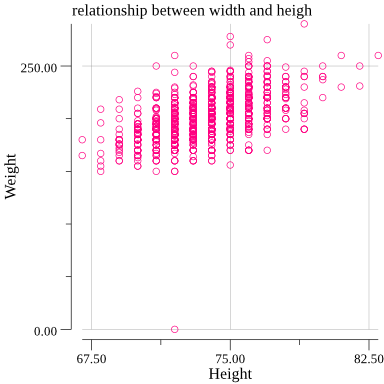

In [52]:
display.PNG(graph1)

#### Visualize the distribution of the weights for all teams

In [66]:
for key :=range teamsMap{
    v := make(plotter.Values, widthsHeighs.Nrow())
    // create a filter over the datafrate using the key map to filter data for team
    filter := dataframe.F{
        Colname:    "Team",
        Comparator: series.Eq,
        Comparando: key,
    }
    // get array, this time only with weights information using the filter (for team)
    v = dataset.Filter(filter).Col("Weight(pounds)").Float()
    // Make a plot and set its title.
    p, err := plot.New()
    if err != nil {
        fmt.Println(err)
    }
    p.Title.Text = fmt.Sprintf("Histogram of a %s", key)
    // Create a histogram of our values drawn
    // from the standard normal.
    h, err := plotter.NewHist(v, 16)
    if err != nil {
        fmt.Println(err)
    }
    // Normalize the histogram.
    h.Normalize(1)
    // Add the histogram to the plot.
    p.Add(h)
    if err := p.Save(4*vg.Inch, 4*vg.Inch, key+"_hist.png"); err !=nil {
        fmt.Println(err)
    }
    
    
    display.PNG(graph)
}

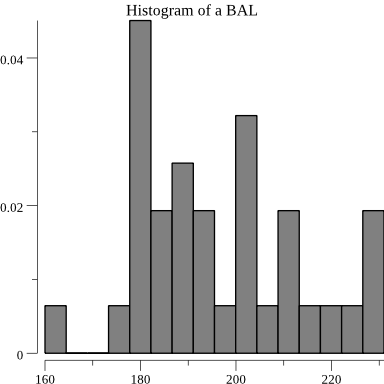

In [73]:
graph, err :=GetGraph("BAL_hist.png")
display.PNG(graph)

Find the linear regression of this data. The idea is to find the best-fit line: y = alpha + beta*x

ERROR: repl.go:1:1: invalid qualified type, expecting packagename.identifier, found: get_ipython().set_next_input <*ast.SelectorExpr>

In [ ]:
alpha, beta := stat.LinearRegression(widthsHeighs.Col("Height(inches)").Float(),widthsHeighs.Col("Weight(pounds)").Float(), nil, false)

In [ ]:
fmt.Printf("y = %f + %f * x",alpha,beta) 